<a href="https://colab.research.google.com/github/yohanesnuwara/formation-evaluation/blob/main/notebooks/FORCE2020_formation_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

In [ ]:
# Get FORCE
!wget "https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip"

--2021-03-02 03:03:58--  https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/train.zip [following]
--2021-03-02 03:03:58--  https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91653972 (87M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[================

In [ ]:
!unzip "/content/train.zip"

Archive:  /content/train.zip
  inflating: train.csv               


In [ ]:
df = pd.read_csv("/content/train.csv", sep=";")

df.head(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
5,15/9-13,495.288,437641.96875,6470972.5,-470.261780,NORDLAND GP.,NaN,19.453100,NaN,1.585567,1.804719,1.879687,72.014420,NaN,NaN,43.657482,160.149292,23.931278,NaN,75.281410,NaN,NaN,-0.601600,NaN,NaN,NaN,NaN,65000,1.0
6,15/9-13,495.440,437641.96875,6470972.5,-470.413788,NORDLAND GP.,NaN,19.462496,NaN,1.576569,1.805498,1.878731,72.588089,NaN,NaN,42.236221,161.250381,23.381790,NaN,76.199951,NaN,NaN,-0.598369,NaN,NaN,NaN,NaN,65000,1.0
7,15/9-13,495.592,437641.96875,6470972.5,-470.565796,NORDLAND GP.,NaN,19.468800,NaN,1.587011,1.808367,1.867837,71.283051,NaN,NaN,39.933563,162.214416,23.632166,NaN,76.199951,NaN,NaN,-0.602039,NaN,NaN,NaN,NaN,65000,1.0
8,15/9-13,495.744,437641.96875,6470972.5,-470.717773,NORDLAND GP.,NaN,19.468800,NaN,1.613674,1.815813,1.847233,69.721436,NaN,NaN,39.163223,161.575104,22.163542,NaN,75.898796,NaN,NaN,-0.614364,NaN,NaN,NaN,NaN,65000,1.0
9,15/9-13,495.896,437641.96875,6470972.5,-470.869782,NORDLAND GP.,NaN,19.468800,NaN,1.634622,1.813916,1.836309,66.677727,NaN,NaN,37.802933,160.583359,23.659925,NaN,68.121262,NaN,NaN,-0.621813,NaN,NaN,NaN,NaN,65000,1.0


In [ ]:
# Print availability of formation in each well
list_fm = df.FORMATION.unique()
list_well = df.WELL.unique()

dfx = pd.DataFrame()

for i in range(1,len(list_fm)): # nan is not considered
  df_ = df[df.FORMATION==list_fm[i]]
  well_unique = df_.WELL.unique()
  avails = []

  for j in range(len(list_well)):
    avail = list_well[j] in well_unique
    avails.append(avail)

  dfx["WELL"]=list_well
  dfx[list_fm[i]]=avails

dfx

,WELL,Utsira Fm.,Balder Fm.,Sele Fm.,Lista Fm.,Heimdal Fm.,Tor Fm.,Hod Fm.,Blodoeks Fm.,Svarte Fm.,Roedby Fm.,Sola Fm.,Aasgard Fm.,Draupne Fm.,Heather Fm.,Hugin Fm.,Smith Bank Fm.,Frigg Fm.,Skagerrak Fm.,Ekofisk Fm.,Kupferschiefer Fm.,Skade Fm.,Grid Fm.,Vaale Fm.,Sleipner Fm.,Hidra Fm.,Tuxen Fm.,Mandal Fm.,Ula Fm.,Bryne Fm.,Tau Fm.,Sandnes Fm.,Intra Draupne Fm. Sst.,Statfjord Fm.,Skade Mb.,BASEMENT,Ran Sst Mb.,Flekkefjord Fm.,Sauda Fm.,Egersund Fm.,Intra Balder Fm. Sst.,Hermod Mb.,Ty Fm.,Hardraade Fm.,Kyrre Fm.,Tryggvason Fm.,Drake Fm.,Cook Fm.,Amundsen Fm.,Grid Mb.,Ty Mb.,Jorsalfare Fm.,Burton Fm.,Mime Fm.,Intra Heather Fm. Sst.,Tarbert Fm.,Ness Fm.,Etive Fm.,Rannoch Fm.,Broom Fm.,Lunde Fm.,Oseberg Fm.,Sognefjord Fm.,Fensfjord Fm.,Krossfjord Fm.,Johansen Fm.,Eiriksson Mb.,Raude Mb.,Agat Fm.,Farsund Fm.
0,15/9-13,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,15/9-15,True,True,True,True,False,True,True,True,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,15/9-17,True,True,True,True,True,True,True,True,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16/1-2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,16/1-6 A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,35/9-5,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
94,35/9-6 S,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,F

## Hugin Fm.

In [ ]:
list_well = df.WELL.unique()
fm_name = "Hugin Fm."

@interact
def f(well=list_well):
  df_ = df[(df.WELL==well) & (df.FORMATION==fm_name)].reset_index(drop=True)
  # msno.matrix(df_)
  # plt.plot()
  return df_

interactive(children=(Dropdown(description='well', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6…

In [ ]:
# Select dataframe of only Hugin Fm.
fm_name = "Hugin Fm."

df_fm = df[df.FORMATION==fm_name]
avail_well = df_fm.WELL.unique()
print(fm_name)
print("Available wells:", avail_well)

dfx_fm = []
for j in range(len(avail_well)):
  df_ = df_fm[df_fm.WELL==avail_well[j]]
  dfx_fm.append(df_)

df_fm = pd.concat(dfx_fm)
df_fm = df_fm.reset_index(drop=True)

df_fm

Hugin Fm.
Available wells: ['15/9-13' '16/10-1' '16/10-2' '16/10-3' '16/2-16' '25/2-13 T4' '25/2-14'
 '25/2-7' '25/3-1' '25/4-5' '25/5-1' '25/5-4' '25/6-1' '25/6-2' '25/7-2'
 '25/8-5 S' '25/8-7' '25/9-1' '26/4-1']


,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,2764.040000,437612.40625,6470983.0,-2738.603760,VESTLAND GP.,Hugin Fm.,8.546324,4.809817,4.621167,2.760107,2.632070,40.561684,NaN,0.268440,4.676155,98.221649,92.096565,NaN,1.801075,NaN,NaN,-0.000927,0.155774,NaN,NaN,4.817778,30000,1.0
1,15/9-13,2764.192000,437612.40625,6470983.0,-2738.755615,VESTLAND GP.,Hugin Fm.,8.411325,5.030989,7.319623,4.508440,2.509926,31.191086,NaN,0.212956,3.949661,96.324669,95.557091,NaN,1.801075,NaN,NaN,-0.006380,0.155774,NaN,NaN,5.209388,30000,1.0
2,15/9-13,2764.344000,437612.40625,6470983.0,-2738.907715,VESTLAND GP.,Hugin Fm.,8.366377,4.957539,8.606117,8.620995,2.419757,29.189167,NaN,0.185228,3.493944,88.219925,102.010239,NaN,1.741955,NaN,NaN,-0.010231,0.155774,NaN,NaN,4.692449,30000,1.0
3,15/9-13,2764.496000,437612.40625,6470983.0,-2739.059814,VESTLAND GP.,Hugin Fm.,8.374572,6.268073,8.474340,18.882824,2.370677,29.045160,NaN,0.179733,3.286825,81.822136,99.817482,NaN,1.524012,NaN,NaN,-0.009402,0.155774,NaN,NaN,7.745627,30000,1.0
4,15/9-13,2764.648000,437612.40625,6470983.0,-2739.211670,VESTLAND GP.,Hugin Fm.,8.369998,7.222919,8.592206,36.021393,2.360931,29.423836,NaN,0.182615,3.286245,78.720932,97.332359,NaN,1.566063,NaN,NaN,-0.002883,0.155774,NaN,NaN,5.990720,30000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651,26/4-1,2819.376199,501132.31250,6608172.0,-2796.108887,VESTLAND GP.,Hugin Fm.,8.297824,2.484140,2.214225,1.916909,2.471609,50.865841,NaN,0.219506,2.961776,86.579338,54.744755,8.5,7.061419,NaN,-0.202176,-0.010254,0.155774,NaN,NaN,NaN,30000,1.0
4652,26/4-1,2819.528200,501132.31250,6608172.0,-2796.260986,VESTLAND GP.,Hugin Fm.,8.280051,2.898187,1.882815,1.854052,2.411653,52.497540,NaN,0.229789,3.039009,87.646996,55.571281,8.5,7.060759,NaN,-0.219949,-0.006565,0.155774,NaN,NaN,NaN,30000,1.0
4653,26/4-1,2819.680200,501132.31250,6608172.0,-2796.412842,VESTLAND GP.,Hugin Fm.,8.302505,2.822361,1.919047,1.850498,2.372001,53.130474,NaN,0.230544,3.312153,94.242256,56.154881,8.5,7.060159,NaN,-0.197495,-0.006541,0.155774,NaN,NaN,NaN,30000,1.0
4654,26/4-1,2819.832200,501132.31250,6608172.0,-2796.564941,VESTLAND GP.,Hugin Fm.,8.375704,2.508853,2.735937,1.859755,2.251860,51.839367,NaN,0.247232,2.933930,108.950294,57.069565,8.5,7.059539,NaN,-0.124297,-0.014656,0.155774,NaN,NaN,NaN,90000,1.0


In [ ]:
def triple_combo_plot(data, DEPT, SP, CALI, GR, ILD, ILM, LL8, DT, NPHI, RHOB,
                      top_depth, bottom_depth):
  
    dept = data[DEPT]
    logs=data[(dept >= top_depth) & (dept <= bottom_depth)]

    # Triple combo variables
    dept = logs[DEPT]
    sp, cali, gr = logs[SP], logs[CALI], logs[GR]
    ild, ilm, ll8 = logs[ILD], logs[ILM], logs[LL8]
    dt, nphi, rhob = logs[DT], logs[NPHI], logs[RHOB]

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    #General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        # for (i,j) in zip(tops_depths,tops):
        #     if ((i>=top_depth) and (i<=bottom_depth)):
        #         axes.axhline(y=i, linewidth=0.5, color='black')
        #         axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
    #1st track: GR, CALI, SP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,10)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(sp, dept, label='SP[mV]', color='blue')
    ax01.set_xlabel('SP[mV]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(cali, dept, '--', label='CALN[in]', color='black') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(gr, dept, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
    #2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(ild, dept, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(ilm, dept, label='ILM[m.ohm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(ll8, dept, '--',label='LL8[m.ohm]', color='black') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('LL8[m.ohm]',color='black')
    ax13.tick_params(axis='x', colors='black')


    #3rd track: DT, RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(dt, dept, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(nphi, dept, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(rhob, dept ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')

### Triple combo

In [ ]:
list_well = df.WELL.unique()

@interact
def f(well=list_well):
  df_ = df[(df.WELL==well) & (df.FORMATION=="Hugin Fm.")].reset_index(drop=True)
  df_.NPHI = df_.NPHI * 100 # Convert from v/v to %

  try:
    dept = df_.DEPTH_MD.values
    top_depth, bottom_depth = np.min(dept), np.max(dept)

    triple_combo_plot(df_, "DEPTH_MD", 
                      "SP", "CALI", "GR", 
                      "RDEP", "RMED", "RSHA", 
                      "DTC", "NPHI", "RHOB",
                      top_depth, bottom_depth)
  except:
    print("Well has no data on that formation")

interactive(children=(Dropdown(description='well', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6…

### Vshale

In [ ]:
#VCLGR
def vclgr(gr_log, gr_clean, gr_clay, correction=None):

    igr=(gr_log-gr_clean)/(gr_clay-gr_clean)       #Linear Gamma Ray
    vclgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vclgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vclgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vclgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vclgr=vclgr_larionov_young
    elif correction == "older":
        vclgr=vclgr_larionov_old
    elif correction=="clavier":
        vclgr=vclgr_clavier
    elif correction=="steiber":
        vclgr=vclgr_steiber
    else:
        vclgr=igr
    return vclgr

#VCLSP
def vclsp(sp_log, sp_clean, sp_clay):
    vclsp=(sp_log-sp_clean)/(sp_clay-sp_clean)
    return vclsp

#VCLRT
def vclrt(rt_log, rt_clean,rt_clay):
    vrt=(rt_clay/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_clay)
    if (rt_log > 2* rt_clay):
        vclrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    else:
        vclrt = vrt
    return vclrt

#VCLND
def vclnd(neut_log,den_log,neut_clean1,den_clean1,neut_clean2,den_clean2,neut_clay,den_clay):
    term1 = (den_clean2-den_clean1)*(neut_log-neut_clean1)-(den_log-den_clean1)*(neut_clean2-neut_clean1)
    term2 =(den_clean2-den_clean1)*(neut_clay-neut_clean1)-(den_clay-den_clean1)*(neut_clean2-neut_clean1)
    vclnd=term1/term2
    return vclnd

In [ ]:
fm_name = "Hugin Fm."
print("Min-max GR of {} \n".format(fm_name))

GR_mins, GR_maxs = [], []
for i in range(len(list_well)):
  df_ = df[df.WELL==list_well[i]]
  df_ = df_[df_.FORMATION==fm_name]
  GR = df_.GR.values

  if len(GR)>1:
    # Only for wells that have GR data, that means it is not an EMPTY list
    GR_min, GR_max =  min(GR), max(GR)
    print("GR min of well {}: {:.2f}".format(list_well[i], GR_min))
    print("GR max of well {}: {:.2f} \n".format(list_well[i], GR_max))
    GR_mins.append(GR_min)
    GR_maxs.append(GR_max)

# Minimum of all GR min
GR_mins = min(GR_mins)
# Maximum of all GR max
GR_maxs = max(GR_maxs)

print("\n")
print("GR min of ALL wells: {}".format(GR_mins))
print("GR max of ALL wells: {}".format(GR_maxs))

Min-max GR of Hugin Fm. 

GR min of well 15/9-13: 21.66
GR max of well 15/9-13: 86.21 

GR min of well 16/10-1: 19.92
GR max of well 16/10-1: 40.44 

GR min of well 16/10-2: 10.61
GR max of well 16/10-2: 163.77 

GR min of well 16/10-3: 61.77
GR max of well 16/10-3: 96.30 

GR min of well 16/2-16: 53.05
GR max of well 16/2-16: 102.75 

GR min of well 25/2-13 T4: 27.22
GR max of well 25/2-13 T4: 99.19 

GR min of well 25/2-14: 35.03
GR max of well 25/2-14: 87.42 

GR min of well 25/2-7: 45.27
GR max of well 25/2-7: 109.29 

GR min of well 25/3-1: 38.09
GR max of well 25/3-1: 132.23 

GR min of well 25/4-5: 12.06
GR max of well 25/4-5: 96.34 

GR min of well 25/5-1: 25.95
GR max of well 25/5-1: 72.43 

GR min of well 25/5-4: 38.35
GR max of well 25/5-4: 68.60 

GR min of well 25/6-1: 29.47
GR max of well 25/6-1: 43.74 

GR min of well 25/6-2: 63.15
GR max of well 25/6-2: 113.28 

GR min of well 25/7-2: 10.26
GR max of well 25/7-2: 95.74 

GR min of well 25/8-5 S: 78.89
GR max of well 25/

In [ ]:
fm_name = "Hugin Fm."
print("Min-max SP of {} \n".format(fm_name))

SP_mins, SP_maxs = [], []
for i in range(len(list_well)):
  df_ = df[df.WELL==list_well[i]]
  df_ = df_[df_.FORMATION==fm_name]
  SP = df_.SP.values
  SP = [x for x in SP if str(x) != "nan"] # Remove NaN from list  

  if len(SP)>1:
    # Only for wells that have SP data, that means it is not an EMPTY list
    # SP = [x for x in SP if str(x) != "nan"] # Remove NaN from list
    SP_min, SP_max =  min(SP), max(SP)
    print("SP min of well {}: {:.2f}".format(list_well[i], SP_min))
    print("SP max of well {}: {:.2f} \n".format(list_well[i], SP_max))
    SP_mins.append(SP_min)
    SP_maxs.append(SP_max)

# Minimum of all SP min
SP_mins = min(SP_mins)
# Maximum of all SP max
SP_maxs = max(SP_maxs)

print("\n")
print("SP min of ALL wells: {}".format(SP_mins))
print("SP max of ALL wells: {}".format(SP_maxs))

Min-max SP of Hugin Fm. 

SP min of well 15/9-13: 88.23
SP max of well 15/9-13: 108.36 

SP min of well 16/10-1: 97.09
SP max of well 16/10-1: 105.78 

SP min of well 16/10-2: 33.36
SP max of well 16/10-2: 113.97 

SP min of well 25/2-13 T4: 163.62
SP max of well 25/2-13 T4: 225.51 

SP min of well 25/2-14: 74.42
SP max of well 25/2-14: 89.53 

SP min of well 25/2-7: 59.06
SP max of well 25/2-7: 69.54 

SP min of well 25/3-1: 213.40
SP max of well 25/3-1: 221.97 

SP min of well 25/5-1: 115.43
SP max of well 25/5-1: 125.67 

SP min of well 25/5-4: -28.53
SP max of well 25/5-4: 33.08 

SP min of well 25/6-1: 110.46
SP max of well 25/6-1: 115.22 

SP min of well 25/6-2: -15.19
SP max of well 25/6-2: -10.18 

SP min of well 25/7-2: 116.25
SP max of well 25/7-2: 177.51 

SP min of well 25/8-7: 168.12
SP max of well 25/8-7: 181.55 

SP min of well 26/4-1: 51.95
SP max of well 26/4-1: 58.39 



SP min of ALL wells: -28.5285778
SP max of ALL wells: 225.51292419


VCLGR and VCLSP

In [ ]:
# Make output dataframe as a copy
df_fm_out = df_fm.copy()

# Input parameters for calculation
# Clean and clay values already calculated above
gr_clean, gr_clay = GR_mins, GR_maxs
sp_clean, sp_clay = SP_mins, SP_maxs

# Compute VCLGR, VCLSP for all wells
vclgr_computed, vclsp_computed = [], []
for i in range(len(df_fm_out)):
  gr = df_fm_out.GR[i]
  sp = df_fm_out.SP[i]
  vclgr_computed.append(vclgr(gr, gr_clean, gr_clay))
  vclsp_computed.append(vclsp(sp, sp_clean, sp_clay))

# Add VCL result to dataframe
df_fm_out["VCLGR"] = vclgr_computed
df_fm_out["VCLSP"] = vclsp_computed

df_fm_out[["WELL", "DEPTH_MD", "GR", "VCLGR", "SP", "VCLSP"]]

,WELL,DEPTH_MD,GR,VCLGR,SP,VCLSP
0,15/9-13,2764.040000,40.561684,0.197397,92.096565,0.474825
1,15/9-13,2764.192000,31.191086,0.136353,95.557091,0.488446
2,15/9-13,2764.344000,29.189167,0.123311,102.010239,0.513848
3,15/9-13,2764.496000,29.045160,0.122373,99.817482,0.505217
4,15/9-13,2764.648000,29.423836,0.124840,97.332359,0.495435
...,...,...,...,...,...,...
4651,26/4-1,2819.376199,50.865841,0.264522,54.744755,0.327794
4652,26/4-1,2819.528200,52.497540,0.275152,55.571281,0.331048
4653,26/4-1,2819.680200,53.130474,0.279275,56.154881,0.333345
4654,26/4-1,2819.832200,51.839367,0.270864,57.069565,0.336946


VCLND

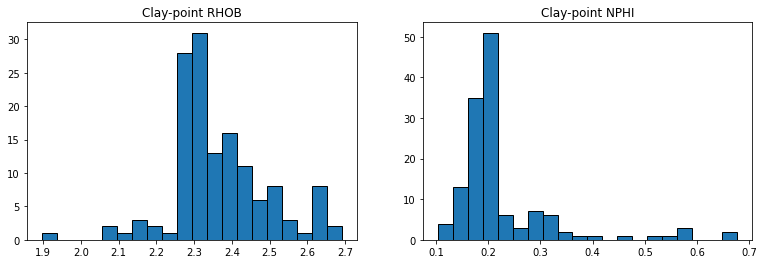

In [ ]:
# Determine RHOB and NPHI of clay point
## Max GR calculated above = GR_maxs = 163.76 
## Select from dataframe that has GR above 100

df_fm_cl = df_fm[df_fm.GR>110].reset_index()
den_clay, neut_clay = df_fm_cl.RHOB.values, df_fm_cl.NPHI.values

plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.hist(den_clay, bins=20, edgecolor="black")
plt.title("Clay-point RHOB")

plt.subplot(1,2,2)
plt.hist(neut_clay, bins=20, edgecolor="black")
plt.title("Clay-point NPHI")

plt.show()

## From the max in histo, seems that den_clay=2.7, neut_clean=0.4

In [ ]:
#Willie-TimeAverage
def phis_shale(dt_sh, dt_ma, dt_fl):
    phis_shale = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    return phis_shale
def phis_w(dt_log, dt_ma, dt_fl, cp):
    phis_w=(1/cp)*(dt_log-dt_ma)/(dt_fl-dt_ma)
    return phis_w
def phis_w_sh_corr(dt_log, dt_ma, dt_fl, cp, dt_sh, vcl):
    phis_w=(1/cp)*(dt_log-dt_ma)/(dt_fl-dt_ma)
    phis_w_sh = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    phis_w_sh_corr = phis_w - vcl * phis_w_sh
    return phis_w_sh_corr

#Raymer-Hunt-Gardner (the alpha(5/8) ranges from 0.625-0.70, 0.67-most, 0.60-gas reservoirs)
def phis_rhg(dt_log, dt_ma, alpha):
    phis_rhg=(alpha)*(dt_log-dt_ma)/(dt_log)
    return phis_rhg
def phis_rhg_sh_corr(dt_log, dt_ma, dt_sh, vcl):
    phis_rhg=(5/8)*(dt_log-dt_ma)/(dt_log)
    phis_rhg_sh = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    phis_rhg_sh_corr = phis_rhg - vcl * phis_rhg_sh
    return phis_rhg_sh_corr

#Density
def phid(den_log, den_ma, den_fl, den_sh, vcl):
    phid = (den_log - den_ma) / (den_fl - den_ma)
    return phid
def phid_shale(den_sh, den_ma, den_fl):
    phid_shale = (den_sh - den_ma) / (den_fl - den_ma)
    return phid_shale
def phid_sh_corr(den, den_ma, den_fl, den_sh, vcl):
    phid = (den - den_ma) / (den_fl - den_ma)
    phid_sh = (den_sh - den_ma) / (den_fl - den_ma)
    phid_sh_corr = phid - vcl * phid_sh
    return phid_sh_corr

# NEUTRON:
def phin_sh_corr(neut, neut_sh, vcl):
    phin_sh_corr = (neut-vcl*neut_sh)/100
    return phin_sh_corr

#Neutron-Density
def phixnd(phinshc, phidshc):
    phixnd= (phinshc + phidshc) / 2
    return phixnd
def phixnd_gas_corr(phin, phid, phin_sh, phid_sh):
    phixnd_gas_corr= ((phin**2+phin**2)/2)**(0.5)    #for gas intervals (nphi<dphi = crossover)
    return phixnd_gas_corr